# ECE 313 Spring 2024: Lab2
## Using Python for Signals and Systems

## Solutions

Prof. Jon Tamir
Name: Fahim Imtiaz
TA: Asad Aali

These labs were developed by Prof. Babak Ayazifar for EE 120 at UC Berkeley

v1 - Spring 2019: Dominic Carrano, Sukrit Arora, and Babak Ayazifar  
v2 - Fall 2019: Dominic Carrano

# Submitting The Notebooks

In terms of what we expect from you to do in completing the labs: every place you're required to answer a question, whether it be in the form of writing code or interpreting plots/results that you generate, it will be marked with "TODO".

When done, go to the notebook menu (under the jupyter logo) and click `File -> Download as -> PDF via LaTeX (.pdf)`. This is what you'll submit to Gradescope. If this gives you an error message, you can instead try `File -> Print Preview` and download that for submission.

### Other iPython Notebook navigation tips
- To add a new cell, either select `"Insert->Insert New Cell Below"` or click the white plus button
- You can change the cell mode from code to text in the pulldown menu. I use `Markdown` for text
- You can change the texts in the `Markdown` cells by double-clicking them.
- `Help->Keyboard Shortcuts` has a list of keyboard shortcuts

# Q1: Convolution

As you know, LTI systems act by convolving an input with the system's impulse response. This is why LTI systems are so nice from an analysis point of view - an LTI system is completely characterized by its impulse response, which is typically measureable to a high degree of precision in practice - just send in an impulse! 

From a certain point of view, ECE 313 is an entire class on LTI system theory and extensions of it. So, naturally, convolution is an important operation for us, both in exploring applications in labs and understanding theoretical underpinnings in class. Accordingly, we've devoted an entire question to helping you gain familiarity with computing convolutions in Python.

## Convolution with numpy

The numpy function for convolution is [np.convolve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html), which takes in three arguments:
- `x`, a numpy array representing the signal $x(n)$.
- `h`, a numpy array representing the signal $h(n)$. 
- `mode`, a string specifying how to truncate the convolution, if at all. 

It returns $y(n) = (x * h)(n)$, with some subtle differences in how the boundaries are handled based on what you pass in for `mode`. There are three options for this parameter: `full`, `same`, and `valid`. Rather than explain the differences in words, we'll go through some actual examples.  

### `mode = "full"`

When you set `mode` to `full`, numpy will compute the entire convolution - if $x$ is a length $M$ array and $h$ is a length $N$ array, the returned array will have length $M + N - 1$. Essentially, this mode is exactly what you've seen so far in class.

In [95]:
import numpy as np
import matplotlib.pyplot as plt # by convention, we import matplotlib.pyplot as plt

# plot in browser instead of opening new windows
%matplotlib inline

In [96]:
np.convolve([1/2, 1/2], [1, 1, 1], 'full')

array([0.5, 1. , 1. , 0.5])

In [97]:
np.convolve([1, 2, 3], [0, 1, 0.5], 'full')

array([0. , 1. , 2.5, 4. , 1.5])

**What makes this mode useful?** You *never* have to worry about data being cut out with `mode="full"` as you do with other convolution modes, as we'll see below! So, if you're ever concerned about the cropping issue, this is always a safe bet!

### `mode = "same"`

This convolution mode only keeps the "middle" part of the result, cutting off data points from each edge until the result has the same length as the longer of the two inputs. This is the most popular convolution mode in practice - since most signals used in digital signal processing tasks are zero padded (for various reasons you'll learn about in later labs), the edges of convolutions often contain zeros, so it's okay to cut them out.

In [98]:
np.convolve([1/2, 1/2], [1, 1, 1], 'same')

array([0.5, 1. , 1. ])

In [99]:
np.convolve([1, 2, 3], [0, 1, 0.5], 'same')

array([1. , 2.5, 4. ])

Note how in both cases, some of our data was cut out! When you use `same`, you have to take care to ensure no data will be cut out in the result by zero-padding both sides of one of the signals. If, for the first convolution, we instead computed

In [100]:
np.convolve([0, 1/2, 1/2, 0], [1, 1, 1], 'same')

array([0.5, 1. , 1. , 0.5])

then all of our data is in tact.

**What makes this mode useful?** Using "same" allows you to deal with fixed size signals (i.e., all arrays are the same length) throughout your code, since a convolution in "same" mode of two length $L$ signals returns a length $L$ signal via cropping, and you can just zero pad to elimiate issues of data being cut out. Does that sound appealing to you? Same.

### `mode = "valid"`

With `valid`, numpy will only keep the part of the convolution where your signals fully overlap. 

In [101]:
np.convolve([1/2, 1/2], [1, 1, 1], 'valid')

array([1., 1.])

In [102]:
np.convolve([1, 2, 3], [0, 1, 0.5], 'valid')

array([2.5])

For the second signal, since the signals have the same length, they only full overlap at one point in time. Thus, we get only one value in our output.

**What makes this mode useful?** It's great when you want to filter some data, but the filter only makes sense when its input is entirely the data from your signal, and no zero padded values are included. For example, if you were applying a moving average filter to stock data, it doesn't make sense to take an average that's partially stock data and partially implicit zeros.

### Final Comments on `mode` 

For the labs, we'll typically tell you what convolution mode to use to avoid any confusion. In practice, the "same" mode is the most popular, as the two signals you're convolving are typically zero-padded to the same lengths; thus the output is the same length as the two inputs, which makes preallocation of memory for your signals easier to track (since everything has the same length). 

We want you to be aware of these subtle differences, as they can be confusing at first. It's worth paying attention to such nuances so you don't waste time trying to fix some boundary issue. And here's the great thing about the iPython notebook environment being so interactive: if you're ever unsure of what something would do, just create a new cell and try it out!

### Your Job

Now that you've seen the basics of how `np.convolve` works, it's time to try it out on your own. Don't worry about defining or tracking any time indices at all (or doing any zero padding) for this question - just generate the signals and convolve as specified by the instructions.

**Make sure you use `plt.stem` for all plots in this question, so the results are displayed as DT signals.** No need to do anything fancy with your plots either (e.g. labelling axes, etc.) beyond what you're asked for - just passing the signal straight into `plt.stem` and adding whatever title the question specifies is fine.

## Q1a: Get Rect

First, convolve a length 3 rect with a length 3 rect and plot it. Use "full" mode. Title it "Convolution of two length 3 rects".

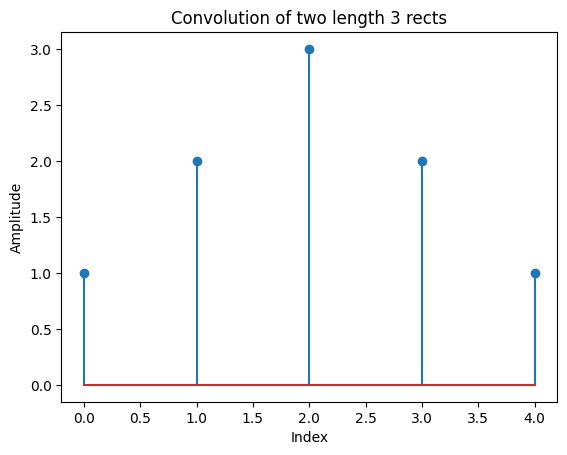

In [127]:
# TODO: convolution of two length 3 rects (mode="full")
import numpy as np
import matplotlib.pyplot as plt
rect1 = np.array([1,1,1])
rect2 = np.array([1,1,1])    

plot = np.convolve(rect1, rect2, mode = 'full')

plt.stem(plot)
plt.title('Convolution of two length 3 rects')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.show()


Now, convolve a length 10 rect with a length 10 rect and plot it, again in "full" mode. Title it "Convolution of two length 10 rects".

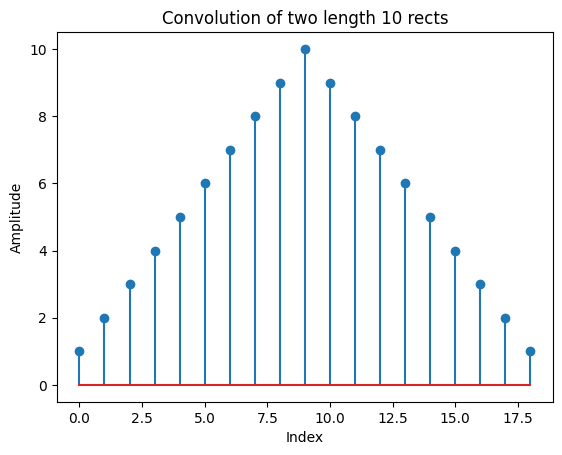

In [126]:
# TODO: convolution of two length 10 rects (mode="full")
import numpy as np
import matplotlib.pyplot as plt
rect1 = np.array([1] *10)
rect2 = np.array([1]*10)

plot = np.convolve(rect1, rect2, mode = 'full')
plt.stem(plot)
plt.title("Convolution of two length 10 rects")
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.show()

Finally, convolve a length 50 rect with a length 50 rect and plot it, again in "full" mode. Title it "Convolution of two length 50 rects".

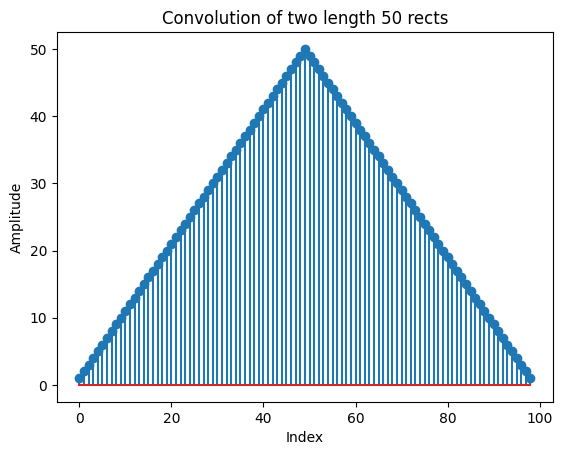

In [119]:
# TODO: convolution of two length 50 rects (mode="full")
import numpy as np
import matplotlib.pyplot as plt
rect1 = np.array([1]*50)
rect2 = np.array([1]*50)

plot = np.convolve(rect1, rect2, mode = 'full')
plt.stem(plot)
plt.title("Convolution of two length 50 rects")
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.show()

**Q:** In general, what shape is the convolution of two rects *of the same length*? A one-word answer is fine.     

Triangle

## Q1b: Get Rect, Part II

Now, we'll convolve rects that have *different* lengths and see what happens. 

**For this part, perform all convolutions in "full" mode, so you don't have to worry about signal values being cut out and can focus on the results.** As a consequence, it's perfectly fine to not zero-pad any of your signals pre-convolution. Remember, "full" mode doesn't cut anything out. For example, if you were asked to convolve a length 2 rect with a length 4 rect, it's fine to use `np.array([1, 1])` and `np.array([1, 1, 1, 1])`, respectively, as the numpy array representations of your signals.

**For all parts of this question, plot the convolution result, and give your plot a reasonable title.**

Start by convolving a length 2 rect with a length 5 rect.

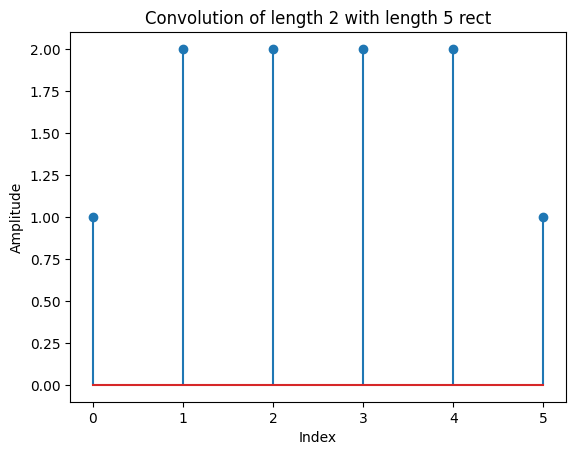

In [140]:
# TODO: convolve and plot length 2 and length 5 rect
import numpy as np
import matplotlib.pyplot as plt
rect1 = np.array([1]*2)
rect2 = np.array([1]*5)
plot = np.convolve(rect1, rect2, mode = 'full')


plt.title("Convolution of length 2 with length 5 rect")
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.stem(plot)
plt.show()

Now, convolve a length 10 and length 20 rect.

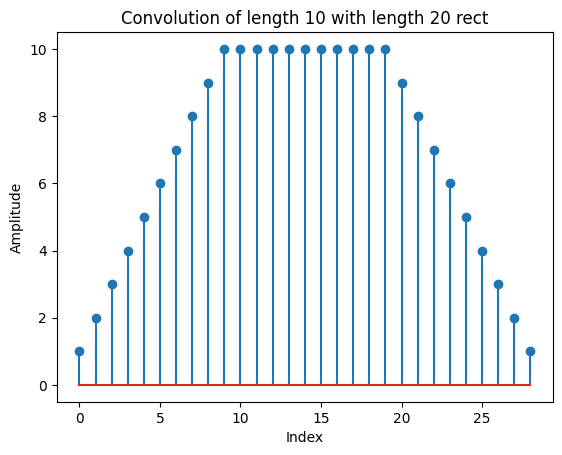

In [143]:
# TODO: convolve and plot length 10 and length 20 rect
import numpy as np
import matplotlib.pyplot as plt
rect1 = np.array([1]*20)
rect2 = np.array([1]*10)
plot = np.convolve(rect1, rect2, mode = 'full')

plt.title("Convolution of length 10 with length 20 rect")
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.stem(plot)
plt.show()

Finally, convolve a length 60 and length 20 rect.

<StemContainer object of 3 artists>

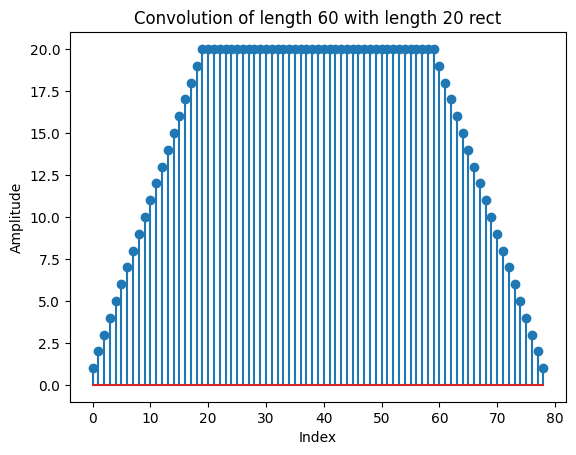

In [144]:
# TODO: convolve and plot length 60 and length 20 rect
import numpy as np
import matplotlib.pyplot as plt
rect1 = np.array([1]*60)
rect2 = np.array([1]*20)
plot = np.convolve(rect1, rect2, mode = 'full')

plt.title("Convolution of length 60 with length 20 rect")
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.stem( plot)

**Q:** In general, the convolution of two rects of different lengths is a trapezoid, which you should see from your plots. We'll define the length of the trapezoid's top as the number of points for which it attains its maximum value. For example, the length of a triangle's top is 1, since it peaks at one data point and slopes downward on either side of the peak. 

Which trapezoid would you expect to have a longer top: one obtained by convolving a length 10 rect and length 20 rect, or one obtained by convolving a length 15 rect and length 20 rect? Explain why in 1-2 sentences.        



Answer: Length 15 and length 20 rectangle, because they are closer to each other in terms of their area so more likely to be closer to rectangle, therefore having a bigger top. 

## Q1c: Get Rect, The Grand Finale

We saw in Q1a what happens when you convolve two rects that have the same length together. But what if we convolve 3 togther (by convolving two, then convolving the result with a third)? What about 4? 5? 10? 100? The result might surprise you. 

In doing so, to make sure the convolution results don't blow up to infinity, we'll normalize our rects to sum to 1. An interesting fact that you'll prove later in the semester is that if you convolve two signals that both sum to 1, the result also sums to 1. We'll use length two rects here, although you'll get a similar result if you use a larger size.

You don't have to write any code for this question; just run the cells.

Let's see what happens when we convolve 2, 3, and 4 rects together.

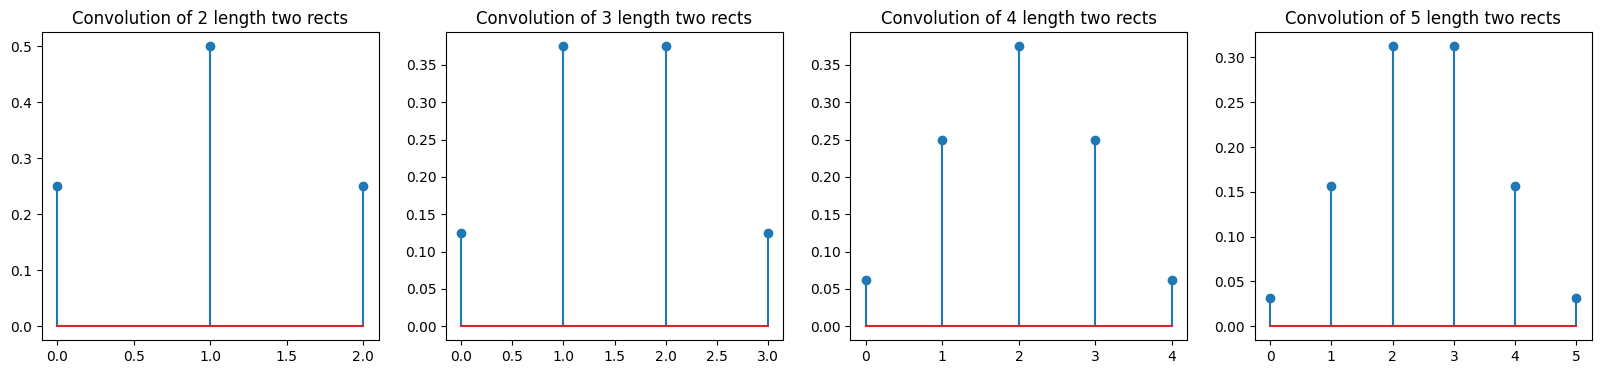

In [109]:
rect = np.array([1/2, 1/2])

plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
x = np.convolve(rect, rect, "full")
plt.stem(x)
plt.title("Convolution of 2 length two rects")

plt.subplot(1, 4, 2)
x = np.convolve(x, rect, "full")
plt.stem(x)
plt.title("Convolution of 3 length two rects")

plt.subplot(1, 4, 3)
x = np.convolve(x, rect, "full")
plt.stem(x)
plt.title("Convolution of 4 length two rects")

plt.subplot(1, 4, 4)
x = np.convolve(x, rect, "full")
plt.stem(x)
plt.title("Convolution of 5 length two rects")
plt.show()

We can see the results getting smoother and smoother each time (i.e., a the transition from the bottom to top occurs over successively more signal values), in addition to the stretching that naturally occurs as a result of convolution. Perhaps you already have some intuition for what will happen if we keep doing this over and over again. Through a very cool feature of matplotlib, we can repeatedly convolve our rects together and update the same plot, seeing how the result "evolves". Run the cell below to convolve 100 rects together, displaying the result after each convolution. 

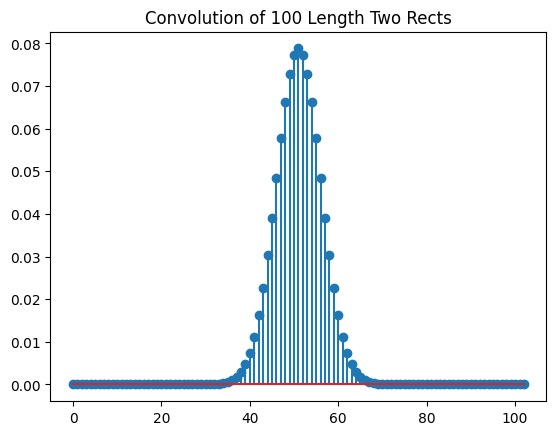

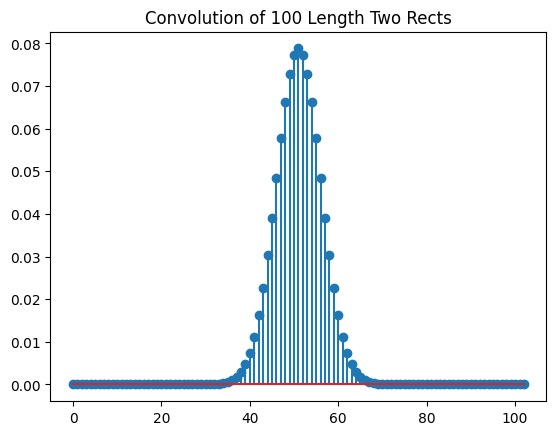

In [110]:
from IPython import display

numconv = 100 # change this to the number of convolutions you want to do
rect = np.array([1/2, 1/2])
y = np.convolve(rect, rect, "full")
for i in range(1, numconv+1):
    y = np.convolve(y, rect, "full")
    plt.clf()
    plt.stem(y)
    plt.title("Convolution of {} Length Two Rects".format(i))
    display.clear_output(wait=True)
    display.display(plt.gcf())

As we continue to convolve more and more rects together, we end up with a bell curve! So, if we wanted to apply a large number of filters that all had rectangular impulse responses (such as in the case of a moving average filter, for example), we could equivalently apply a *Gaussian filter*, i.e. one with a Gaussian (bell curve) as its impulse response. The Gaussian filter shows up in a wide variety of signal processing contexts for smoothing, and as you've seen here, it's the limiting case of applying a large number of rectangular filters (i.e., moving averages).

## Optional reading: A probability theoretic view

Believe it or not, it's no coincidence that we got a Gaussian-like signal by convolving a large number of rects. This is actually a consequence of one of the most celebrated results in probability theory, the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem). This theorem says that, under certain conditions, as you add together more and more random variables, the result approaches a Gaussian distribution, i.e. the familiar bell curve. An interesting fact covered in EECS 126 is that if you add two independent random variables, the resultant distribution is the **convolution** of the summands' distributions. Thus, by convolving 100 rects together, we are effectively adding together 100 independent uniform random variables (the probability mass function of a uniform r.v. is a rectangle, since each value is equally probable), and we see that the result has a Gaussian distribution!

**Note:** We don't expect to you to know any probability theory for this class. If the preceding paragraph made no sense at all, don't worry about it. There are some interesting connections between signal processing and probability theory that will be mentioned from time to time in the labs for your enrichment, but you're not responsible for understanding any of their content.

# Q2: The 1D Edge Detector

The 1D edge detector is used in signal processing to, as you may have guessed from the name, detect edges, or jumps in a signal's amplitude. It's referred to as 1D to distinguish it from 2D edge-detecting filters used in image processing — basic signals only containing amplitude versus time information are referred to as "1D" whereas images are often considered as "2D" signals. Videos are considered "3D" signals, with time (as you go from frame to frame) being the third dimension. Almost all signals you'll see in EE 120 will be 1D.

The impulse response of a 1D edge detector is defined as:

$$h[n] = \delta[n] - \delta[n - 1]$$

In this question, we'll explore several important properties of the edge detector.

The filter works by taking the difference between every pair of adjacent signal values. If you have a sequence of constant values, the filter will repeatedly output zeros, as there's no "edge". 

Similarly, if the signal has a zero (at time $n-1$) followed by a 1 (at time $n$), the filter will output a 1 (at time $n$), indicating an edge of "size" 1. The filter also encodes information about the edge's "direction" - if you instead had a 1 (at time $n-1$) followed by a 0 (at time $n$), the output (at time $n$) would be -1.

Because of this, the 1D edge detector can be thought of as the discrete-time equivalent of taking a derivative, an idea we'll explore in greater depth in part b of this question. 

## Q2a: Piecewise Constant Signals

We'll go through two examples with this filter. First, we'll try it out on a piecewise constant signal. We call a DT signal "piecewise constant" if it consists only of constant-height segments each spread over more than one sample. The first two signals below are piecewise constant; the third is not.

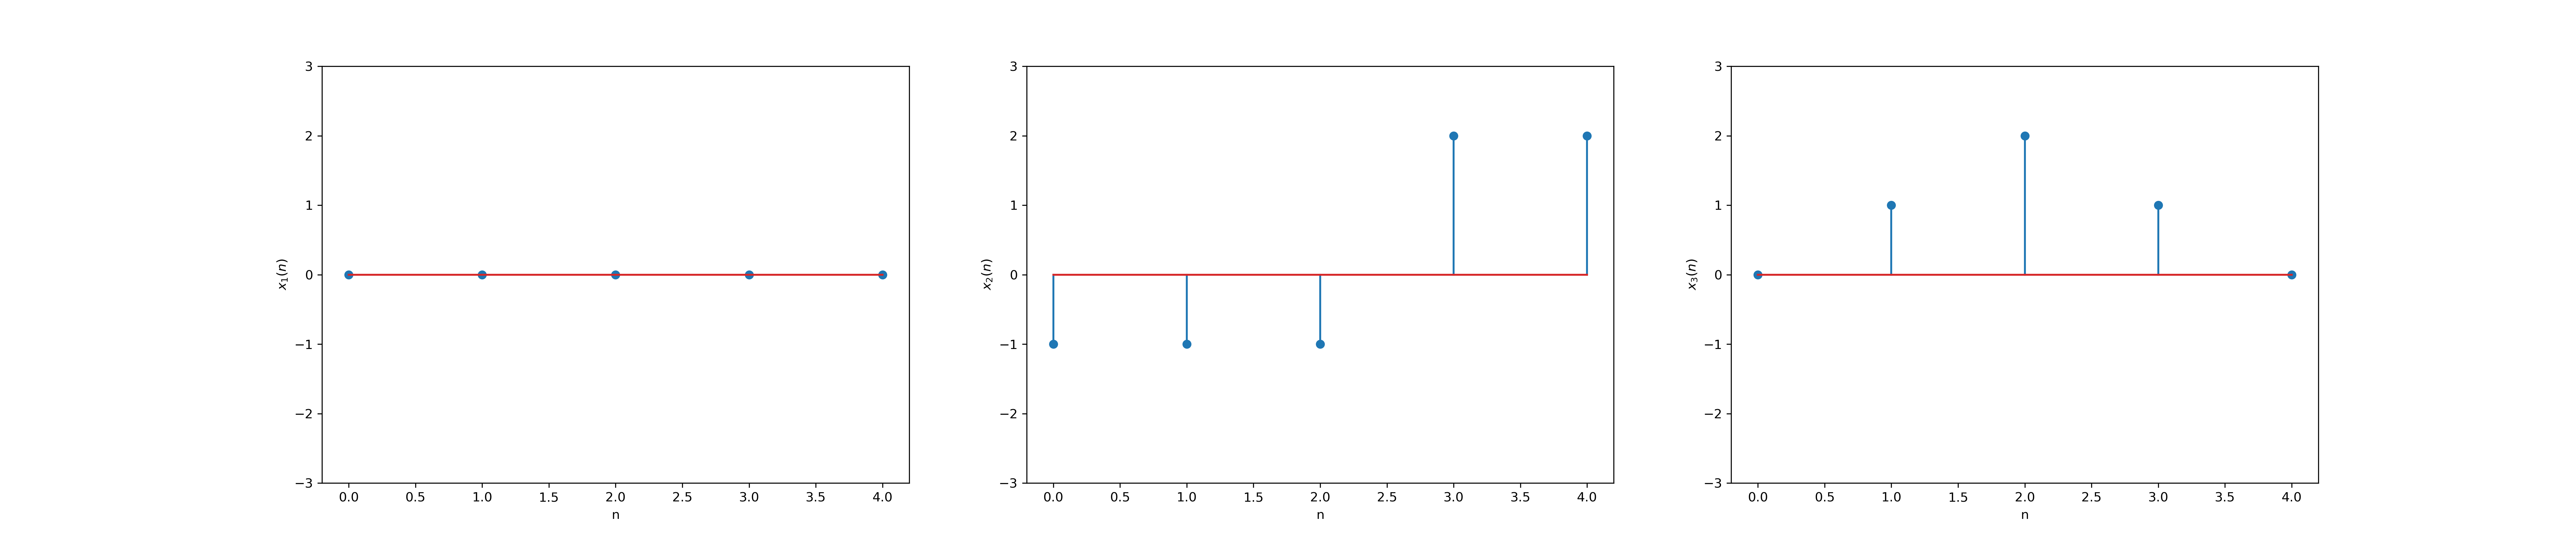

### Your Job

In the cell below:  
- Using the time indices $\{0, 1, ..., 19, 20\}$, define the piecewise constant signal $x$ as  

$$x[n] = \sum_{k = 5}^{9} \delta[n - k] + 3\sum_{k = 10}^{13} \delta[n - k] + 2\sum_{k = 14}^{18} \delta[n - k]$$  


- Define the edge detector's impulse response $h$, but only at its nonzero points (so that the numpy array representing $h$ contains two elements).
    - Throughout this lab, we'll typically be defining our impulse responses over their nonzero points to avoid offset issues and using "same" for convolution. As you saw in Lab 1, "same" truncates convolved signals to the same length as the longer of the two arguments, cutting out points from the result's edges. Essentially, "same" acts just like "full" but with some truncation; we'll be zero padding the input signals as necessary to handle this.
- Compute $y = x * h$ using "same" for the convolution mode.
- Once done with the previous three steps, run the cell to plot the results (plotting code has been provided for you).  

In [145]:
# TODO your code here
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(21)   
h = np.array([1,-1])
x = np.zeros_like(n)
x[5:10] = 1
x[10:14] = 3
x[14:19] = 2
y = np.convolve(x,h, mode= 'same')

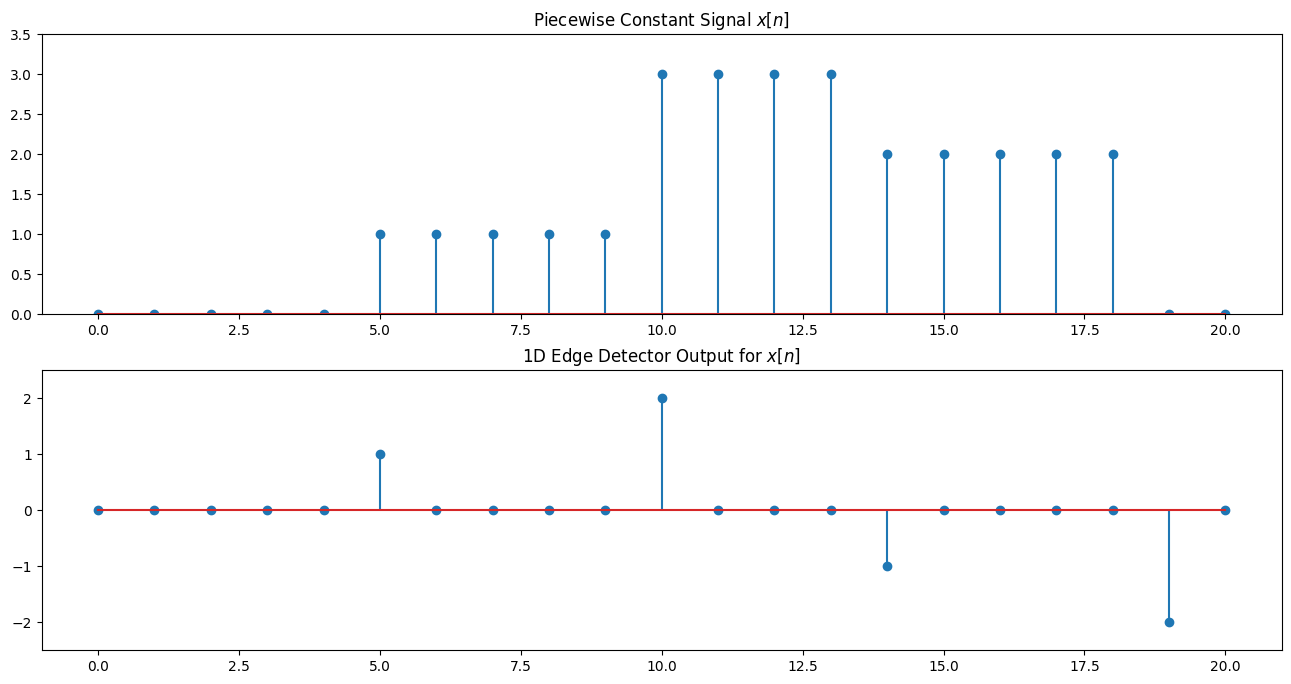

In [146]:
# Plot results
plt.figure(figsize=(16, 8))

plt.subplot(2, 1, 1)
plt.stem(n, x)
plt.ylim([0, 3.5])
plt.title("Piecewise Constant Signal $x[n]$")

plt.subplot(2, 1, 2)
plt.stem(n, y)
plt.ylim([-2.5, 2.5])
plt.title("1D Edge Detector Output for $x[n]$")

plt.show()

**Q:** $x$ is a piecewise-constant signal, changing a total of four times: once from 0->1, then 1->3, then 3->2, and finally 2->0. How many points of the edge detector's output are nonzero (that is, how many edges are detected)?



4 edges are deteced as there are 4 times that constant signal has changed resulting in 4 edges

**Q:** One of the hottest areas of signal processing in the past ~15 years has been the study of sparse (mostly zero) signals, including both acquisition and representation, known as *compressed sensing*. A key part of compressed sensing algorithms is applying some *sparsifying transform* to signals that retain all the signal's information (i.e., the original signal could be completely recovered from the transformed one) but result in a new signal that is mostly zero. 

Suppose you're interested in developing compressed sensing algorithms for piecewise constant signals, and are in need of a way to sparsify them. How would you do so by only using the first signal value, $x(0)$, and using an LTI filter of your choice as the sparsifying transform? Explain both what LTI filter you would use, and how to recover the original signal from the filtered one. You can ignore noise that would be present for real world signals — assume the signal truly is piecewise-constant like the ones above. Also, you may assume $x(n) = 0$ for $n < 0$, since this is basically what we're doing in the digital setup.

We can use a difference filter to detect edges as mentioned earlier in the lab doc. Let's say we apply an LTI of [1,-1] to signal x and obtain filtered signal y. We can detect transitions of the original signal x where y would have non-zero values. Since x is a constant signal we can reconstruct it using an inverse operation on filtered signal y to recover it. 

## Q2b: The Edge Detector as a DT Differentiator

The 1D edge detector is sometimes also referred to as a *moving difference* filter, since it operates by subtracting adjacent points. This has a particularly nice connection to the idea from calculus of taking a derivative of a function, and many properties of the 1D edge detector can be discovered by considering it as a discrete-time analogue of taking a signal's derivative. 

Recall that given a function $f: \mathbb{R} \xrightarrow{} \mathbb{R}$, the derivative of $f$ is defined as

$$f'(t) = \lim_{\Delta t \xrightarrow{} 0}\dfrac{f(t + \Delta t) - f(t)}{\Delta t}$$

and as we make $\Delta t$ smaller and smaller, we get better and better approximations of $f'(t)$. But in DT, all arguments to our signals have to be integers, so $\Delta t$ has to be an integer. The smallest it could then be, without actually being zero, is 1, in which case we recover the formula for the 1D edge detector!

Let's revisit some of the classic results you saw in your first calculus class, but instead of using functions that take real numbers as inputs, we'll use DT signals.

### Your Job

In the cell below:
- Create a length 50 *ramp signal* $r$, defined as
$$r[n] = \sum_{k=1}^{50} k \delta[n - k] = \delta[n - 1] + 2 \delta[n - 2] + 3 \delta[n - 3] + ... + 50 \delta[n - 50]$$
- Compute $y = r * h$, where $h$ is the (non zero-padded) 1D edge detector's impulse response, just as in Q1a. **Use "valid" as the convolution mode** - we only want to difference values from our actual signal (i.e. where $x$ and $h$ fully overlap).
- In separate figures (or you can use two subplots inside the same figure as was done in the provided code for Q1a; up to you), one above the other, plot $r$ and $y$ (plot $r$ on the top figure and $y$ on the bottom one). A few instructions regarding your plot:
    - **Use `plt.stem` to make stem plots**.
    - Give your plots reasonable titles.

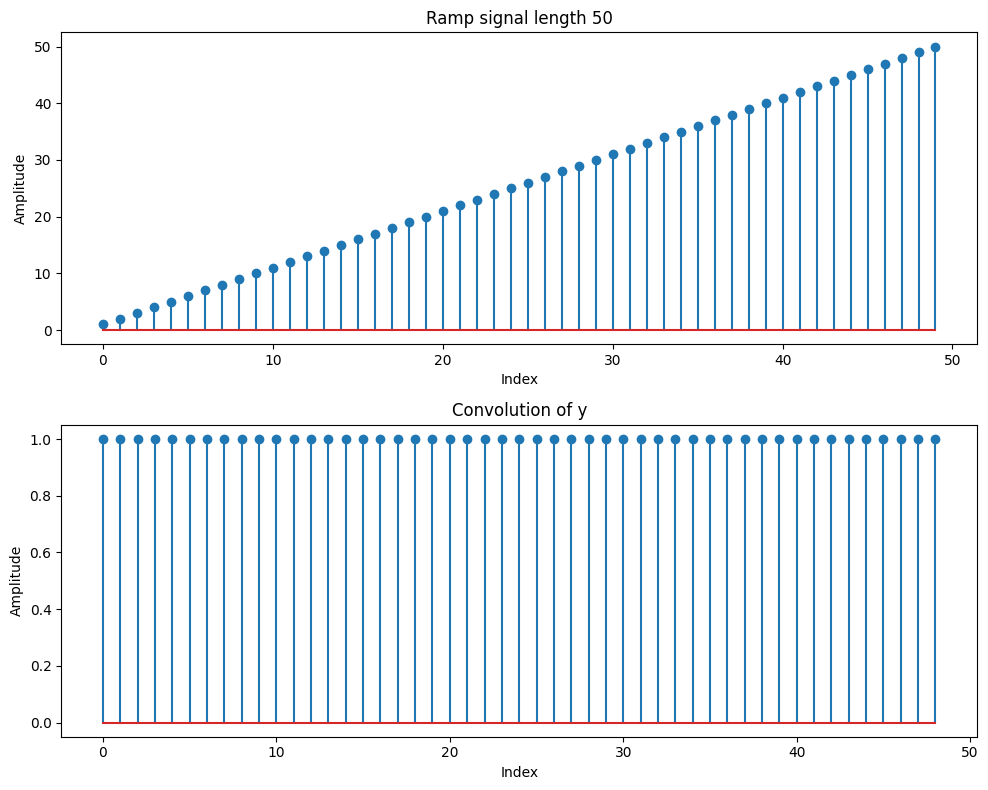

In [113]:
# TODO your code here
import numpy as np
import matplotlib.pyplot as plt
r = np.arange(1, 51)
h = np.array([1,-1])

y = np.convolve(r,h, mode = 'valid')

plt.figure(figsize=(10,8))

plt.subplot(2, 1, 1)
plt.stem(r)
plt.title('Ramp signal length 50')
plt.xlabel('Index')
plt.ylabel('Amplitude')

plt.subplot(2,1,2)
plt.stem(y)
plt.title('Convolution of y')
plt.xlabel('Index')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

**Q:** A ramp signal linearly increases. You should see in your plot that a 1D edge detector, or moving difference, outputs a constant signal when given a ramp as its input. What real function ($f(t) = ?$) does the ramp remind you of? What is that function's derivative (what's $f'(t)$)? How does the derivative for it match up against the edge detector's output?

The ramp signal resembles the function f(t)= 0.5t^2. 
When we take the derivative of 0.5t^2 then we get f'(t) = t so that is a linear function that matches with the output of edge detector. The egde detector computes the difference between two points resulting in linear signal similar to derivative of quadratic ramp function. 

Let's do another! In the cell below:
- Create a length 51 quadratic signal $x[n] = n^2$ for $n = 0, 1, ..., 50$.
- Compute $y = r * h$ just as you did in the previous example, where $h$ is the (unpadded) 1D edge detector's impulse response. Again, use "valid" for the mode.
- Plot $x$ and $y$ the same way you plotted $r$ and $y$ in the previous example, in separate plots with $x$'s above $y$'s.

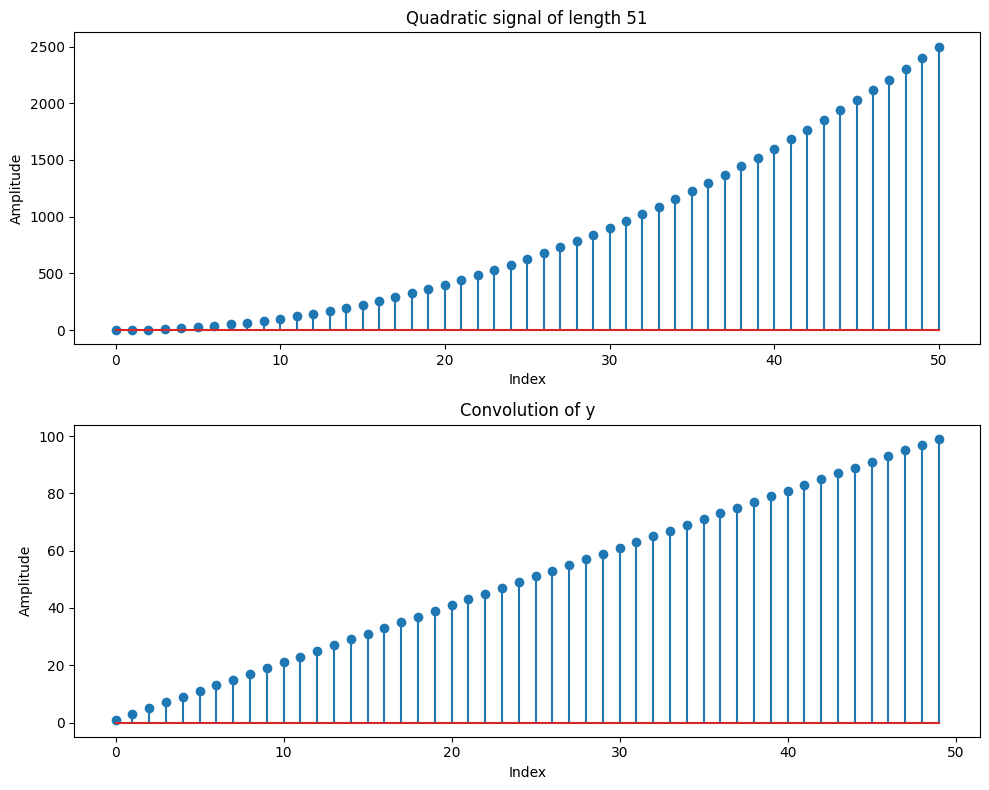

In [114]:
# TODO your code here
import numpy as np
import matplotlib.pyplot as plt

r = np.arange(51) ** 2
h = np.array([1,-1])
y = np.convolve(r,h, mode = 'valid')

index_x = np.arange(len(r))

plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
plt.stem(index_x,r)
plt.title('Quadratic signal of length 51')
plt.xlabel('Index')
plt.ylabel('Amplitude')

plt.subplot(2,1,2)
plt.stem(y)
plt.title('Convolution of y')
plt.xlabel('Index')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

**Q:** Same question as before. You should see in your plot that a 1D edge detector, or moving difference, outputs a ramp signal when given a quadratic as its input. What real function ($f(t) = ?$) does the quadratic remind you of? What is that function's derivative (what's $f'(t)$)? How does the derivative for it match up against the edge detector's output?

The quadratic signal resembles the function f(t)= t^3/3. 
When we take the derivative of t^3/3 then we get f'(t) = t^2 so that is a quadratic function that matches with the output of edge detector. The egde detector computes the difference between two points resulting in linear signal similar to derivative of cubic quadratic function.

## Q2c: "Differentiating" Noise

Now that we've tried our edge detector on a piecewise constant signal, let's try it on a less well-behaved signal: some noise! In this part, as well as the moving average filter, we'll use what's commonly referred to as "Gaussian noise" as our test signal. 

### What is this "noise" you speak of?

In many real-world applications, when using some data that has been collected (i.e., a signal), you don't have access to the original signal (call it $x$). Instead, you have access to $\tilde{x} = x + z$, where $z$ is "noise" that corrupts the signal. A large part of signal processing, machine learning, statistics, data science, and many other application areas involves extracting as much meaning as possible from the measured signal $\tilde{x}$. A popular choice for modeling $z$ is what's known as "Gaussian noise". The name comes from the fact that the noise itself is random, and so it has to be drawn from some probability distribution, which in this case is the Gaussian distribution. The justification for this choice is due to the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), since in many cases, the noise riding on top of a signal is a superposition of a large number of various random factors. For example, the [thermal noise](https://en.wikipedia.org/wiki/Johnson%E2%80%93Nyquist_noise) in electronics from interactions between particles as they bounce around and hit each other has been found to be very close to Gaussian, which makes sense, as the number of individual atoms involved is large, with each pair of interacting atoms serving as a separate random event.

As was mentioned in Lab 1, you don't need to know probability theory for this class. But due to the popularity of the Gaussian noise model in signal processing, it's worth experimenting with as a test signal.

### Your Job

The signal `noise` is defined for you below: 

In [115]:
noise = np.random.normal(0, 5, 1000) # 1000 samples of mean=0, stddev=5 gaussian noise

Now, add code to apply the (unpadded, i.e. the numpy array is length 2) edge detector to it, and store the result in `noise_filt`. Again, use "valid" as the convolution mode. Plotting code has been provided for you. You don't have to do much coding for this part.

Note that we'll start using `plt.plot` from here on out. We'll be using longer signals (we generated 1000 samples of noise) and in addition to `plt.plot` being more efficient, it'll be much easier to visualize our results, as mentioned in "Background".

In [116]:
# TODO your filtering code here; store result in noise_filt
import numpy as np
edge = np.array([1,-1])
noise_filt = np.convolve(noise,edge,mode='valid')

NOTE: The signals `noise_filt` and `noise` will not necessarily fit within the -20 to 20 y-limits we've set for the plot. Since it's random, it's possible we'll draw values that, either before or after filtering, will go outside these limits.

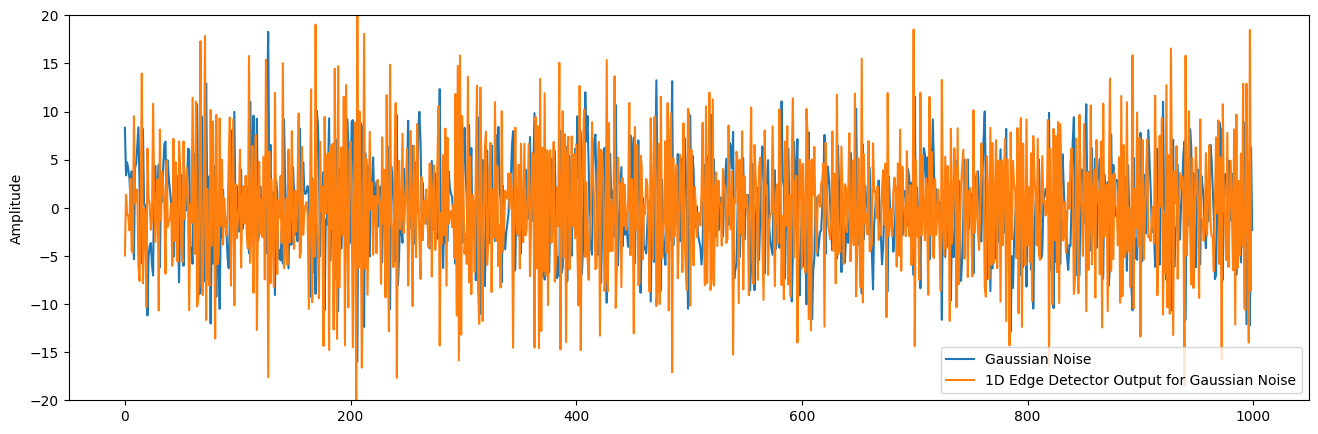

In [117]:
# Plot results
plt.figure(figsize=(16, 5))
plt.plot(noise)
plt.plot(noise_filt)
plt.ylim([-20, 20])
plt.ylabel("Amplitude")
plt.legend(("Gaussian Noise", "1D Edge Detector Output for Gaussian Noise"))
plt.show()

**Q:** Qualitatively, does the filter amplify or suppress the "strength" of the noise? What implications might this have if we want to detect edges on a signal that has been corrupted by a large amount of noise?

The filter suppresses the strength of the noise. We might not be able to accurately detect edges on a signal that has been corrupted by noise. When signal has been corrupted by large amount of noise, edge detection can be challenging therefore less accurate. 

# References
[1] The official Python 3 language documentation. [Link](https://docs.python.org/3/).  
[2] The official numpy and scipy documentation. [Link](https://docs.scipy.org/doc/).  
[3] The official matplotlib documentation. [Link](https://matplotlib.org/contents.html)  